<img src='https://repository-images.githubusercontent.com/121802384/c355bb80-7d42-11e9-9e0e-4729609f9fbc' alt='WRF-Hydro Logo' width="15%"/>

# Lesson S1 - Defining the model domain and initial conditions using the WRF Preprocessing System (WPS)

## Overview
This lesson covers creating your case-specific domain and defining static and initial conditions used for the land surface model within WRF-Hydro. 

### Software and input data
The uses the following software:
* WPS v4.6.0 built with the GNU compilers
* R environment including all libraries for running create_wrfinput and create_soilproperties scripts
* WPS geographical input data for the contiguous United States 

**Note:** Only USGS and default datasets are supported in this container. `Lai_modis_30s`, `nlcd2011_30m`, and `topo_30s` are subsets for training purposes only

## Defining the model domain and creating the geogrid file
WRF-Hydro leverages the extensive domain generation and geophysical dataset processing tools available in the [WRF Preprocessing System (WPS)](http://www2.mmm.ucar.edu/wrf/users/) to define model domains and generate input files for the land surface model. In particular WRF-Hydro requires the geogrid and file derived from these WPS utilities and a wrfinput file from WRF or a utility script provided by the WRF-Hydro team. 

This tutorial walks users through the process of manually creating a geogrid file from an existing WPS installation and creating wrfinput files from provided script packages.  

For those interested in the details of running the complete WPS system and generating wrfinput files through WRF, this is covered in our Docker training on the coupled WRF and WRF-Hydro modeling system.

### Data sources
The WPS geographical input data (e.g. land cover, soil texture, and terrain height) are some of the primary datasets used by WRF-Hydro. The entire dataset collection can be obtained from the WPS geographical input data [download page](http://www2.mmm.ucar.edu/wrf/users/download/get_sources_wps_geog.html). However, these data are rather large (~50GB) and contain a number of datasets that are not used in most implementations of WRF-Hydro. 

To facilitate the domain generation process, the WRF-Hydro team has created a subset of the data by removing unnecessary data, removing resolutions of the data not commonly used, and limiting the areal extent of this subset. This is consistent with the availability of other datasets used in this tutorial. Thus, the dataset provided with this container is considerably smaller than the complete WPS geographical input dataset.

### WPS geogrid
The WPS program `geogrid` is used to create the `geo_em.d01.nc` file, hereafter referred to as the *geogrid* file. The `geogrid` program takes a Fortran namelist (`namelist.wps`) defining the projection, resolution, and extent of the model domain as well as the desired input fields and the [WPS geographical input data](http://www2.mmm.ucar.edu/wrf/users/download/get_sources_wps_geog.html) as inputs and creates the geogrid file. 

### Defining domain boundaries
The land surface model in WRF-Hydro operates on the domain defined within the geogrid file. The `geogrid` program generates this file based upon input variables specified in the `namelist.wps` file. 

The first step to creating the geogrid file is to define our domain boundaries. The `geogrid` program takes by default a centerpoint x and y grid specification, and other projection information to define a bounding box for the domain. If you do not already have coordinates, you can obtain them from Google Earth or a standard GIS system. However, for this tutorial we have supplied the coordinates for you and you may use the WRF-Hydro geogrid Python command line utility to visualize the domain location and create the geogrid file given these coordinates.

### Exploring the WPS geogrid utility
The WPS `geogrid` utility is controlled by options set in the `namelist.wps`. As previously stated, there are many options in the `namelist.wps` file that are not relevant to most WRF-Hydro users. For educational purposes, we will take a quick look at a full `namelist.wps` file and then discuss the relevant options used by the WRF-Hydro geogrid utility in more detail.

#### Setting up the lesson directory

**Step 1: Setup the directory for this lesson**

First, we need to create a directory to hold the inputs and outputs for this lesson.

In [1]:
%%bash
rm -rf ~/wrf-hydro-training/lesson-wps/geogrid
mkdir -p ~/wrf-hydro-training/lesson-wps/geogrid

**Step 2: View the namelist** 
    
In the example case is a sample `namelist.wps` file for the domain of interest

In [2]:
%%bash

cd ~/wrf-hydro-training/lesson-wps
cp ~/wrf-hydro-training/example_case/supplemental/namelist.wps .
cat namelist.wps

&share

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!  Specify the number of domains
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

 max_dom = 1,

/

&geogrid

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
! Define the extend in west-east (e_we) and south-north (e_sn) directions
!  Note: will create a domain of size (e_we-1) x (e_sn-1)
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

 e_we              =  16,
 e_sn              =  17,

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
! Define the center point of your domain
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

 ref_lat   =   41.47100
 ref_lon   =  -73.74365

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
! Define the domain grid spacing (in meters)
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

 dx = 1000,
 dy = 1000,

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
! Define the map projection
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

 map_proj = 'lambert',
 truelat1  =  30.0,
 truelat2  =  60.0,
 stand_lon =  -97.00,

!!!!!!!!!!!!!!!!!

A full description of these options can be found in the [WPS User Guide](https://www2.mmm.ucar.edu/wrf/users/docs/user_guide_v4/v4.2/users_guide_chap3.html). 

The options that are of interest to most WRF-Hydro users are the following:

**Table 1. WPS namelist options relevent to WRF-Hydro**

|Option|Description|
|------|-----------|
| e_we | The number of grid edges in the west-east dimension. The number of grid centers will be e_we-1. |
| e_sn | The number of grid edges in the south-north dimension. The number of grid centers will be e_sn-1. |
| ref_lat | A real value specifying the latitude part of a (latitude, longitude) center-point of the domain. |
| ref_lon | A real value specifying the longitude part of a (latitude, longitude) center-point of the domain. West longitudes are negative, and the value of ref_lon should be in the range [-180, 180]. |
| dx | A real value specifying the grid distance in the x-direction where the map scale factor is 1. The grid distance is in meters for the 'polar', 'lambert', and 'mercator' projection, and in degrees longitude for the 'lat-lon' projection. |
| dy | A real value specifying the grid distance in the y-direction where the map scale factor is 1. The grid distance is in meters for the 'polar', 'lambert', and 'mercator' projection, and in degrees latitude for the 'lat-lon' projection. |
| map_proj | A character string specifying the projection of the simulation domain. Accepted projections are 'lambert', 'polar', 'mercator', and 'lat-lon'. Default value is 'lambert'. |
| truelat1 | A real value specifying, the first true latitude for the Lambert conformal conic projection, or the only true latitude for the Mercator and polar stereographic projections. |
| truelat2 | A real value specifying, the second true latitude for the Lambert conformal conic projection. For all other projections, truelat2 is ignored. No default value. |
| stand_lon | A real value specifying, the longitude that is parallel with the y-axis in the Lambert conformal and polar stereographic projections. For the regular latitude-longitude projection, this value gives the rotation about the earth's geographic poles. No default value. |
| geog_data_res | A character string specifying a corresponding resolution or list of resolutions separated by + symbols of source data to be used when interpolating static terrestrial data to the grid. This string should contain a resolution matching a string preceding a colon in a rel_path or abs_path specification (see the description of GEOGRID.TBL options) in the GEOGRID.TBL file for each field. If a resolution in the string does not match any such string in a rel_path or abs_path specification for a field in GEOGRID.TBL, a default resolution of data for that field, if one is specified, will be used. If multiple resolutions match, the first resolution to match a string in a rel_path or abs_path specification in the GEOGRID.TBL file will be used. Default value is 'default'. |
| geog_data_path | A character string giving the path, either relative or absolute, to the directory where the geographical data directories may be found. This path is the one to which rel_path specifications in the GEOGRID.TBL file are given in relation to. No default value. |

### Creating the geogrid file
In this section, we will create the geogrid file using the WPS geogrid utility. 

In [3]:
%%bash
cd ~/wrf-hydro-training/lesson-wps
cp -r /home/docker/WRF_WPS/utilities/geog_conus/* geogrid/
cp geogrid/GEOGRID.TBL.ARW.wrf_hydro_training geogrid/GEOGRID.TBL

In [4]:
%%bash
cd ~/wrf-hydro-training/lesson-wps/
geogrid

Parsed 7 entries in GEOGRID.TBL
Processing domain 1 of 1
  Processing XLAT and XLONG
  Processing MAPFAC
  Processing F and E
  Processing ROTANG
  Processing LANDUSEF
  Calculating landmask from LANDUSEF ( WATER =  16 )
  Processing HGT_M
  Processing SOILTEMP
  Processing SOILCTOP
  Processing SCT_DOM
  Processing SOILCBOT
  Processing SCB_DOM
  Processing GREENFRAC
  Processing LAI12M
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!  Successful completion of geogrid.        !
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


### Inspecting the geogrid file
Now that we have created our geogrid file, we will quickly display the file header using the *ncdump* command line utility and open the file using the Python library `xarray` to visualize its contents. 

In [5]:
%%bash

cd ~/wrf-hydro-training/lesson-wps
ncdump -h geo_em.d01.nc

netcdf geo_em.d01 {
dimensions:
	Time = UNLIMITED ; // (1 currently)
	DateStrLen = 19 ;
	west_east = 15 ;
	south_north = 16 ;
	south_north_stag = 17 ;
	west_east_stag = 16 ;
	land_cat = 24 ;
	soil_cat = 16 ;
	month = 12 ;
variables:
	char Times(Time, DateStrLen) ;
	float XLAT_M(Time, south_north, west_east) ;
		XLAT_M:FieldType = 104 ;
		XLAT_M:MemoryOrder = "XY " ;
		XLAT_M:units = "degrees latitude" ;
		XLAT_M:description = "Latitude on mass grid" ;
		XLAT_M:stagger = "M" ;
		XLAT_M:sr_x = 1 ;
		XLAT_M:sr_y = 1 ;
	float XLONG_M(Time, south_north, west_east) ;
		XLONG_M:FieldType = 104 ;
		XLONG_M:MemoryOrder = "XY " ;
		XLONG_M:units = "degrees longitude" ;
		XLONG_M:description = "Longitude on mass grid" ;
		XLONG_M:stagger = "M" ;
		XLONG_M:sr_x = 1 ;
		XLONG_M:sr_y = 1 ;
	float XLAT_V(Time, south_north_stag, west_east) ;
		XLAT_V:FieldType = 104 ;
		XLAT_V:MemoryOrder = "XY " ;
		XLAT_V:units = "degrees latitude" ;
		XLAT_V:description = "Latitude on V grid" ;
		XLAT_V:stagger = "

In [6]:
import xarray as xr
from matplotlib import pyplot as plt
xr.set_options(display_style="html")

ds = xr.open_dataset('~/wrf-hydro-training/lesson-wps/geo_em.d01.nc')
ds

<xarray.Dataset> Size: 110kB
Dimensions:     (Time: 1, south_north: 16, west_east: 15, south_north_stag: 17,
                 west_east_stag: 16, land_cat: 24, soil_cat: 16, month: 12)
Dimensions without coordinates: Time, south_north, west_east, south_north_stag,
                                west_east_stag, land_cat, soil_cat, month
Data variables: (12/39)
    Times       (Time) |S19 19B ...
    XLAT_M      (Time, south_north, west_east) float32 960B ...
    XLONG_M     (Time, south_north, west_east) float32 960B ...
    XLAT_V      (Time, south_north_stag, west_east) float32 1kB ...
    XLONG_V     (Time, south_north_stag, west_east) float32 1kB ...
    XLAT_U      (Time, south_north, west_east_stag) float32 1kB ...
    ...          ...
    SOILCTOP    (Time, soil_cat, south_north, west_east) float32 15kB ...
    SCT_DOM     (Time, south_north, west_east) float32 960B ...
    SOILCBOT    (Time, soil_cat, south_north, west_east) float32 15kB ...
    SCB_DOM     (Time, south_north, west_east) float32 960B ...
    GREENFRAC   (Time, month, south_north, west_east) float32 12kB ...
    LAI12M      (Time, month, south_north, west_east) float32 12kB ...
Attributes: (12/46)
    TITLE:                           OUTPUT FROM GEOGRID V4.6.0
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        16
    SOUTH-NORTH_GRID_DIMENSION:      17
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    j_parent_end:                    -1122361856
    parent_grid_ratio:               1000000000
    sr_x:                            1
    sr_y:                            1
    FLAG_MF_XY:                      1
    FLAG_LAI12M:                     1

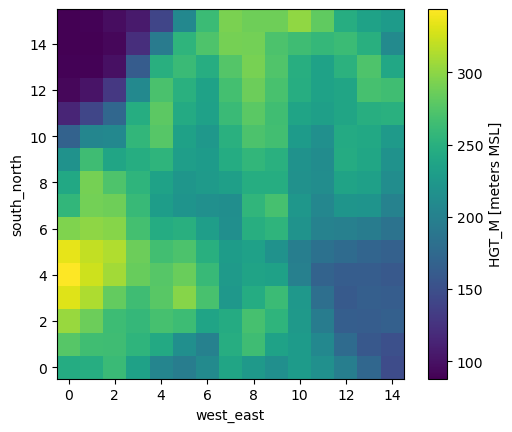

In [7]:
p = ds.HGT_M.plot()
p.axes.set_aspect('equal')

### Creating the wrfinput file

In [8]:
%%bash

cd ~/wrf-hydro-training/lesson-wps
cp ~/wrf-hydro-training/wrf_hydro_model_tools/parameters/create_wrfinput/*.R .
Rscript create_wrfinput.R --geogrid="geo_em.d01.nc"

[1] "ncks -O -4 -v XLAT_M,XLONG_M,HGT_M,SOILTEMP,LU_INDEX,MAPFAC_MX,MAPFAC_MY,GREENFRAC,LAI12M,SOILCTOP geo_em.d01.nc wrfinput_d01.nc"
[1] "ncrename -O -v HGT_M,HGT wrfinput_d01.nc wrfinput_d01.nc"
[1] "ncrename -O -v XLAT_M,XLAT wrfinput_d01.nc wrfinput_d01.nc"
[1] "ncrename -O -v XLONG_M,XLONG wrfinput_d01.nc wrfinput_d01.nc"
[1] "ncrename -O -v LU_INDEX,IVGTYP wrfinput_d01.nc wrfinput_d01.nc"
[1] "ncks -O -x -v SOILTEMP,GREENFRAC,LAI12M,SOILCTOP wrfinput_d01.nc wrfinput_d01.nc"


**View the *wrfinput_d01.nc* file**

In [9]:
%%bash

cd ~/wrf-hydro-training/lesson-wps
ncdump -h wrfinput_d01.nc

netcdf wrfinput_d01 {
dimensions:
	Time = UNLIMITED ; // (1 currently)
	south_north = 16 ;
	west_east = 15 ;
	soil_layers_stag = 4 ;
variables:
	float CANWAT(Time, south_north, west_east) ;
		CANWAT:units = "kg/m^2" ;
		CANWAT:_FillValue = -1.e+36f ;
	float DZS(Time, soil_layers_stag) ;
		DZS:units = "m" ;
		DZS:_FillValue = -1.e+36f ;
	float HGT(Time, south_north, west_east) ;
		HGT:FieldType = 104 ;
		HGT:MemoryOrder = "XY " ;
		HGT:units = "meters MSL" ;
		HGT:description = "Topography height" ;
		HGT:stagger = "M" ;
		HGT:sr_x = 1 ;
		HGT:sr_y = 1 ;
	int ISLTYP(Time, south_north, west_east) ;
		ISLTYP:_FillValue = -9999 ;
	float IVGTYP(Time, south_north, west_east) ;
		IVGTYP:FieldType = 104 ;
		IVGTYP:MemoryOrder = "XY " ;
		IVGTYP:units = "category" ;
		IVGTYP:description = "Dominant category" ;
		IVGTYP:stagger = "M" ;
		IVGTYP:sr_x = 1 ;
		IVGTYP:sr_y = 1 ;
	float LAI(Time, south_north, west_east) ;
		LAI:units = "m^2/m^2" ;
		LAI:_FillValue = -1.e+36f ;
	float MAPFAC_MX(Time, 

### Inspecting the wrfinput file

In [10]:
ds = xr.open_dataset('~/wrf-hydro-training/lesson-wps/wrfinput_d01.nc')
ds

<xarray.Dataset> Size: 25kB
Dimensions:    (Time: 1, south_north: 16, west_east: 15, soil_layers_stag: 4)
Dimensions without coordinates: Time, south_north, west_east, soil_layers_stag
Data variables: (12/20)
    CANWAT     (Time, south_north, west_east) float32 960B ...
    DZS        (Time, soil_layers_stag) float32 16B ...
    HGT        (Time, south_north, west_east) float32 960B ...
    ISLTYP     (Time, south_north, west_east) float64 2kB ...
    IVGTYP     (Time, south_north, west_east) float32 960B ...
    LAI        (Time, south_north, west_east) float32 960B ...
    ...         ...
    TSK        (Time, south_north, west_east) float32 960B ...
    TSLB       (Time, soil_layers_stag, south_north, west_east) float32 4kB ...
    XLAND      (Time, south_north, west_east) float64 2kB ...
    XLAT       (Time, south_north, west_east) float32 960B ...
    XLONG      (Time, south_north, west_east) float32 960B ...
    ZS         (Time, soil_layers_stag) float32 16B ...
Attributes: (12/48)
    TITLE:                           OUTPUT FROM GEOGRID V4.6.0
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        16
    SOUTH-NORTH_GRID_DIMENSION:      17
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    sr_x:                            1
    sr_y:                            1
    FLAG_MF_XY:                      1
    FLAG_LAI12M:                     1
    NCO:                             netCDF Operators version 5.2.1 (Homepage...
    history:                         Fri Apr 25 16:55:26 2025: ncks -O -x -v ...

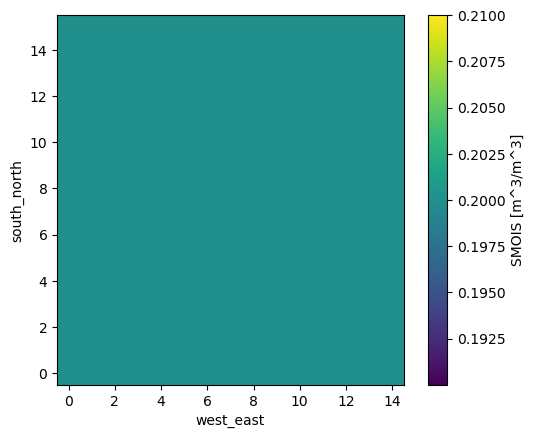

In [11]:
p = ds.SMOIS.sel(soil_layers_stag=0).plot()
p.axes.set_aspect('equal')

### Creating the soil properties file

In [12]:
%%bash

cd ~/wrf-hydro-training/lesson-wps

cp ~/wrf-hydro-training/wrf_hydro_model_tools/parameters/create_soilproperties/*.R .

cp ~/wrf-hydro-training/wrf_hydro_nwm_public/src/Land_models/NoahMP/run/*TBL .
cp ~/wrf-hydro-training/wrf_hydro_nwm_public/src/template/HYDRO/*TBL .

Rscript create_soilproperties.R

[1] "ncks -O -4 -v HGT_M geo_em.d01.nc soil_properties.nc"


smcref
dwsat
smcdry
smcwlt
bexp
dksat
psisat
quartz
refdk
refkdt
slope
smcmax
cwpvt
vcmx25
mp
hvt
mfsno
rsurfexp
rsurfsnow
scamax
ssi
snowretfac
tau0
AXAJ
BXAJ
XXAJ


[1] "ncks -O -x -v HGT_M soil_properties.nc soil_properties.nc"
[1] "ncks -O -4 -v HGT_M geo_em.d01.nc hydro2dtbl.nc"


SMCMAX1
SMCREF1
SMCWLT1
OV_ROUGH2D
LKSAT
NEXP


[1] "ncks -O -x -v HGT_M hydro2dtbl.nc hydro2dtbl.nc"


Geogrid attributes: vegWater=16 vegLake=-1 soilWater=14 maxSoilClass=16
Updating: soil_properties.nc


[1] "Processing AXAJ"
[1] "Updating soil parameters: AXAJ   AXAJ"


The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19


[1] "Processing BXAJ"
[1] "Updating soil parameters: BXAJ   BXAJ"
[1] "Processing XXAJ"
[1] "Updating soil parameters: XXAJ   XXAJ"


The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19
The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19
The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19


[1] "Processing bexp"
[1] "Updating soil parameters: bexp   BB"
[1] "Processing cwpvt"
[1] "Updating MP parameters: cwpvt   CWPVT"


The following `from` values were not present in `x`: 2, 3, 4, 6, 8, 9, 10, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27
The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19
The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19


[1] "Processing dksat"
[1] "Updating soil parameters: dksat   SATDK"
[1] "Processing dwsat"
[1] "Updating soil parameters: dwsat   SATDW"
[1] "Processing hvt"
[1] "Updating MP parameters: hvt   HVT"


The following `from` values were not present in `x`: 2, 3, 4, 6, 8, 9, 10, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27
The following `from` values were not present in `x`: 2, 3, 4, 6, 8, 9, 10, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27
The following `from` values were not present in `x`: 2, 3, 4, 6, 8, 9, 10, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27
The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19


[1] "Processing mfsno"
[1] "Updating MP parameters: mfsno   MFSNO"
[1] "Processing mp"
[1] "Updating MP parameters: mp   MP"
[1] "Processing psisat"
[1] "Updating soil parameters: psisat   SATPSI"
[1] "Processing quartz"
[1] "Updating soil parameters: quartz   QTZ"


The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19


[1] "Processing refdk"
[1] "Updating GEN parameters: refdk   REFDK"
[1] "Processing refkdt"
[1] "Updating GEN parameters: refkdt   REFKDT"
[1] "Processing rsurfexp"
[1] "Updating global MP  parameters: rsurfexp   RSURF_EXP"
[1] "Processing rsurfsnow"
[1] "Updating global MP  parameters: rsurfsnow   RSURF_SNOW"
[1] "Processing scamax"
[1] "Updating global MP  parameters: scamax   SCAMAX"
[1] "Processing slope"
[1] "Updating GEN parameters: slope   SLOPE"
[1] "Processing smcdry"
[1] "Updating soil parameters: smcdry   DRYSMC"


The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19


[1] "Processing smcmax"
[1] "Updating soil parameters: smcmax   MAXSMC"
[1] "Processing smcref"
[1] "Updating soil parameters: smcref   REFSMC"


The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19
The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19


[1] "Processing smcwlt"
[1] "Updating soil parameters: smcwlt   WLTSMC"


The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19


[1] "Processing snowretfac"
[1] "Updating global MP  parameters: snowretfac   SNOW_RET_FAC"
[1] "Processing ssi"
[1] "Updating global MP  parameters: ssi   SSI"
[1] "Processing tau0"
[1] "Updating global MP  parameters: tau0   TAU0"
[1] "Processing vcmx25"
[1] "Updating MP parameters: vcmx25   VCMX25"


The following `from` values were not present in `x`: 2, 3, 4, 6, 8, 9, 10, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27
Updating: hydro2dtbl.nc


[1] "Processing LKSAT"
[1] "Updating HYDRO soil parameters: LKSAT   dksat   SATDK"


The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19


[1] "Processing NEXP"
[1] "Updating HYDRO global parameters: NEXP   NEXP"
[1] "Processing OV_ROUGH2D"
[1] "Updating HYDRO veg parameters: OV_ROUGH2D   OV_ROUGH2D"


The following `from` values were not present in `x`: 2, 3, 4, 6, 8, 9, 10, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28


[1] "Processing SMCMAX1"
[1] "Updating HYDRO soil parameters: SMCMAX1   smcmax   MAXSMC"


The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19


[1] "Processing SMCREF1"
[1] "Updating HYDRO soil parameters: SMCREF1   smcref   REFSMC"


The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19


[1] "Processing SMCWLT1"
[1] "Updating HYDRO soil parameters: SMCWLT1   smcwlt   WLTSMC"


The following `from` values were not present in `x`: 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19


### Inspecting the soil properties file

In [13]:
ds = xr.open_dataset('~/wrf-hydro-training/lesson-wps/soil_properties.nc')
ds

<xarray.Dataset> Size: 51kB
Dimensions:     (Time: 1, south_north: 16, west_east: 15, soil_layers_stag: 4)
Dimensions without coordinates: Time, south_north, west_east, soil_layers_stag
Data variables: (12/26)
    AXAJ        (Time, south_north, west_east) float32 960B ...
    BXAJ        (Time, south_north, west_east) float32 960B ...
    XXAJ        (Time, south_north, west_east) float32 960B ...
    bexp        (Time, soil_layers_stag, south_north, west_east) float32 4kB ...
    cwpvt       (Time, south_north, west_east) float32 960B ...
    dksat       (Time, soil_layers_stag, south_north, west_east) float32 4kB ...
    ...          ...
    smcref      (Time, soil_layers_stag, south_north, west_east) float32 4kB ...
    smcwlt      (Time, soil_layers_stag, south_north, west_east) float32 4kB ...
    snowretfac  (Time, south_north, west_east) float32 960B ...
    ssi         (Time, south_north, west_east) float32 960B ...
    tau0        (Time, south_north, west_east) float32 960B ...
    vcmx25      (Time, south_north, west_east) float32 960B ...
Attributes: (12/48)
    TITLE:                           OUTPUT FROM GEOGRID V4.6.0
    SIMULATION_START_DATE:           0000-00-00_00:00:00
    WEST-EAST_GRID_DIMENSION:        16
    SOUTH-NORTH_GRID_DIMENSION:      17
    BOTTOM-TOP_GRID_DIMENSION:       0
    WEST-EAST_PATCH_START_UNSTAG:    1
    ...                              ...
    sr_x:                            1
    sr_y:                            1
    FLAG_MF_XY:                      1
    FLAG_LAI12M:                     1
    history:                         Fri Apr 25 16:55:35 2025: ncks -O -x -v ...
    NCO:                             netCDF Operators version 5.2.1 (Homepage...

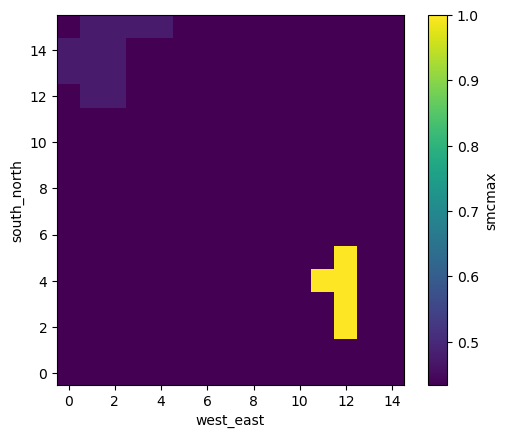

In [14]:
p = ds.smcmax.sel(soil_layers_stag=0).plot()
p.axes.set_aspect('equal')

This concludes the lesson on domain definition and initial conditions for WRF-Hydro. 

© UCAR 2025